This code runs Logistic Regression on the entire >1400-protein *pancancer* dataset . It incorporates 5-fold k-fold cross-validation.

Running the code with the top 1463 proteins (i.e. all proteins), as well as the top 1000, top 500, top 200, and top 100 proteins (determined by kbest) provides information on how the number of proteins used affects the ability to reliably distinguish between the different cancer types


In [39]:
import pandas as pd

In [40]:
# Import the data

df_full = pd.read_csv("pancancer.csv") # See notes below on updating this path
# Note: pancancer.csv is a large file so we have shared it on Google Drive. 
# To run, download pancancer.csv and update the path above to point it to where you have stored the file


In [41]:
# Create a pivot table that makes each sample a row, and includes the data for each protein in a column

Pancancer_pivot = df_full.pivot_table(index = ['Sample_ID', 'Cancer'], columns = 'UniProt', values = 'NPX' )
Pancancer_pivot.reset_index(inplace=True)
Pancancer_pivot.head(15)

UniProt,Sample_ID,Cancer,A1E959,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,...,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6E0,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
0,AML_1,AML,0.59590,0.87345,0.40330,-0.21795,0.97590,-0.04425,5.97330,0.03015,...,1.52805,2.40925,2.58555,7.69330,4.32885,3.46615,4.93360,-0.01040,0.32665,0.95790
1,AML_10,AML,0.15515,1.03055,NaN,0.50050,0.87950,3.61830,1.29445,-0.08635,...,0.61565,1.79640,-0.48390,1.79995,2.66910,0.94350,2.44435,-0.00260,0.74770,0.51200
2,AML_11,AML,0.90720,0.67170,0.13230,0.24330,0.42020,0.02195,3.52340,1.58670,...,0.83225,1.19945,0.90375,3.98285,0.60025,2.04640,2.24825,0.10105,1.93530,0.65845
3,AML_12,AML,0.89270,0.65435,0.40980,NaN,0.00695,NaN,NaN,1.07615,...,1.64900,1.85145,-0.06600,0.43480,NaN,0.83995,1.19885,0.19860,0.49505,NaN
4,AML_13,AML,0.21820,0.67290,-0.02685,-1.16925,1.12230,2.02365,4.21855,-0.49085,...,1.66665,2.16280,2.03590,6.10880,4.36115,2.25940,4.29675,0.57890,1.06285,0.49960
5,AML_14,AML,0.08920,0.22545,-0.47415,1.83150,0.92420,6.56080,4.30555,0.92640,...,5.56885,2.46510,1.82050,6.14920,5.99445,1.44280,5.41060,0.41685,3.25440,1.09110
6,AML_15,AML,-0.07185,0.10130,-1.39720,3.05240,1.26085,5.36945,1.55795,2.40705,...,1.48585,2.23725,0.15615,2.42300,4.81290,0.49115,2.69765,0.45220,1.49335,1.31605
7,AML_16,AML,0.64490,-0.00030,-1.52450,0.76560,1.11520,1.03430,0.93625,2.18410,...,2.53005,1.27950,-0.38825,0.62780,2.90270,0.30915,1.44680,0.46245,1.34865,0.24400
8,AML_17,AML,0.11200,0.84130,-0.81540,0.51790,2.04955,1.60310,3.77460,-0.22100,...,NaN,NaN,1.16780,NaN,NaN,1.61305,2.62540,0.03750,2.35580,NaN
9,AML_18,AML,0.97170,0.61700,-1.53600,0.22060,1.15250,1.96905,-0.01260,3.56180,...,3.79465,1.84825,0.11195,0.87955,3.94285,-0.40650,1.03135,0.24875,2.67350,1.88915


In [42]:
# Combine all the blood cancers into one category
df_bloodcombined = Pancancer_pivot.copy(deep = True)
#df_bloodcombined=df_bloodcombined.replace(to_replace = ['AML', 'CLL', 'LYMPH', 'MYEL'], value = 'BLOOD' )

In [43]:
# Verify that the groups were combined as expected
set(df_bloodcombined['Cancer'])

{'AML',
 'BRC',
 'CLL',
 'CRC',
 'CVX',
 'ENDC',
 'GLIOM',
 'LUNGC',
 'LYMPH',
 'MYEL',
 'OVC',
 'PRC'}

In [44]:
# Specify the protein list 
proteins=df_bloodcombined.columns[2:]
# Check that we have the right number of proteins
len(proteins)

1463

In [45]:
df_bloodcombined.head()

UniProt,Sample_ID,Cancer,A1E959,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,...,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6E0,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
0,AML_1,AML,0.59590,0.87345,0.40330,-0.21795,0.97590,-0.04425,5.97330,0.03015,...,1.52805,2.40925,2.58555,7.69330,4.32885,3.46615,4.93360,-0.01040,0.32665,0.95790
1,AML_10,AML,0.15515,1.03055,NaN,0.50050,0.87950,3.61830,1.29445,-0.08635,...,0.61565,1.79640,-0.48390,1.79995,2.66910,0.94350,2.44435,-0.00260,0.74770,0.51200
2,AML_11,AML,0.90720,0.67170,0.13230,0.24330,0.42020,0.02195,3.52340,1.58670,...,0.83225,1.19945,0.90375,3.98285,0.60025,2.04640,2.24825,0.10105,1.93530,0.65845
3,AML_12,AML,0.89270,0.65435,0.40980,NaN,0.00695,NaN,NaN,1.07615,...,1.64900,1.85145,-0.06600,0.43480,NaN,0.83995,1.19885,0.19860,0.49505,NaN
4,AML_13,AML,0.21820,0.67290,-0.02685,-1.16925,1.12230,2.02365,4.21855,-0.49085,...,1.66665,2.16280,2.03590,6.10880,4.36115,2.25940,4.29675,0.57890,1.06285,0.49960


In [46]:
# Encode the cancer types as numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_bloodcombined['Cancer'] = le.fit_transform(df_bloodcombined['Cancer'])

In [47]:
df_bloodcombined.head(15)

UniProt,Sample_ID,Cancer,A1E959,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,...,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6E0,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
0,AML_1,0,0.59590,0.87345,0.40330,-0.21795,0.97590,-0.04425,5.97330,0.03015,...,1.52805,2.40925,2.58555,7.69330,4.32885,3.46615,4.93360,-0.01040,0.32665,0.95790
1,AML_10,0,0.15515,1.03055,NaN,0.50050,0.87950,3.61830,1.29445,-0.08635,...,0.61565,1.79640,-0.48390,1.79995,2.66910,0.94350,2.44435,-0.00260,0.74770,0.51200
2,AML_11,0,0.90720,0.67170,0.13230,0.24330,0.42020,0.02195,3.52340,1.58670,...,0.83225,1.19945,0.90375,3.98285,0.60025,2.04640,2.24825,0.10105,1.93530,0.65845
3,AML_12,0,0.89270,0.65435,0.40980,NaN,0.00695,NaN,NaN,1.07615,...,1.64900,1.85145,-0.06600,0.43480,NaN,0.83995,1.19885,0.19860,0.49505,NaN
4,AML_13,0,0.21820,0.67290,-0.02685,-1.16925,1.12230,2.02365,4.21855,-0.49085,...,1.66665,2.16280,2.03590,6.10880,4.36115,2.25940,4.29675,0.57890,1.06285,0.49960
5,AML_14,0,0.08920,0.22545,-0.47415,1.83150,0.92420,6.56080,4.30555,0.92640,...,5.56885,2.46510,1.82050,6.14920,5.99445,1.44280,5.41060,0.41685,3.25440,1.09110
6,AML_15,0,-0.07185,0.10130,-1.39720,3.05240,1.26085,5.36945,1.55795,2.40705,...,1.48585,2.23725,0.15615,2.42300,4.81290,0.49115,2.69765,0.45220,1.49335,1.31605
7,AML_16,0,0.64490,-0.00030,-1.52450,0.76560,1.11520,1.03430,0.93625,2.18410,...,2.53005,1.27950,-0.38825,0.62780,2.90270,0.30915,1.44680,0.46245,1.34865,0.24400
8,AML_17,0,0.11200,0.84130,-0.81540,0.51790,2.04955,1.60310,3.77460,-0.22100,...,NaN,NaN,1.16780,NaN,NaN,1.61305,2.62540,0.03750,2.35580,NaN
9,AML_18,0,0.97170,0.61700,-1.53600,0.22060,1.15250,1.96905,-0.01260,3.56180,...,3.79465,1.84825,0.11195,0.87955,3.94285,-0.40650,1.03135,0.24875,2.67350,1.88915


In [48]:
# Split the data into X and y
X = df_bloodcombined[proteins]
y = df_bloodcombined['Cancer']

In [49]:
X.head()

UniProt,A1E959,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,O00182,O00186,...,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6E0,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
0,0.59590,0.87345,0.40330,-0.21795,0.97590,-0.04425,5.97330,0.03015,1.59230,2.19040,...,1.52805,2.40925,2.58555,7.69330,4.32885,3.46615,4.93360,-0.01040,0.32665,0.95790
1,0.15515,1.03055,NaN,0.50050,0.87950,3.61830,1.29445,-0.08635,1.16670,NaN,...,0.61565,1.79640,-0.48390,1.79995,2.66910,0.94350,2.44435,-0.00260,0.74770,0.51200
2,0.90720,0.67170,0.13230,0.24330,0.42020,0.02195,3.52340,1.58670,1.41675,1.16275,...,0.83225,1.19945,0.90375,3.98285,0.60025,2.04640,2.24825,0.10105,1.93530,0.65845
3,0.89270,0.65435,0.40980,NaN,0.00695,NaN,NaN,1.07615,0.98105,0.65770,...,1.64900,1.85145,-0.06600,0.43480,NaN,0.83995,1.19885,0.19860,0.49505,NaN
4,0.21820,0.67290,-0.02685,-1.16925,1.12230,2.02365,4.21855,-0.49085,2.13880,1.47010,...,1.66665,2.16280,2.03590,6.10880,4.36115,2.25940,4.29675,0.57890,1.06285,0.49960


In [50]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y, test_size=0.2, random_state=100)

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import sem
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.metrics import geometric_mean_score  # G-Mean

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', max_iter=500),
    #"k-Nearest Neighbors (n=5)": KNeighborsClassifier(n_neighbors=5), 
    #"k-Nearest Neighbors (n=13)": KNeighborsClassifier(n_neighbors=13),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=100),
    #"XGBoost, 10 estimators": XGBClassifier(n_estimators=10),
    #"XGBoost, 50 estimators": XGBClassifier(n_estimators=50),
    #"XGBoost, 100 estimators": XGBClassifier(n_estimators=100),
    #"XGBoost, 200 estimators": XGBClassifier(n_estimators=200),
    #"XGBoost, 500 estimators": XGBClassifier(n_estimators=500)
}

In [53]:
# Cross-validation parameters
n_splits = 5  # Number of folds
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=100)

In [54]:
# Initialize KNNImputer for handling missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")

Version with all 1463 proteins


Evaluating Logistic Regression with k-fold CV, kNN imputation, and SelectKBest...


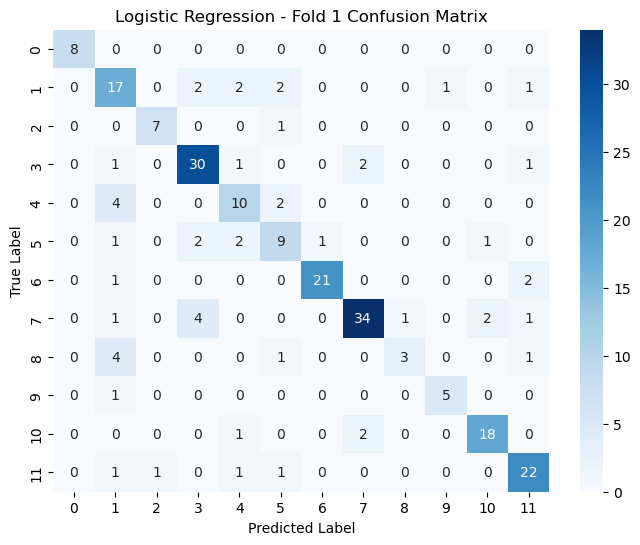


Fold 1 - Accuracy: 0.7764, F1 Score: 0.7763, ROC AUC: 0.9646, G-Mean: 0.8696


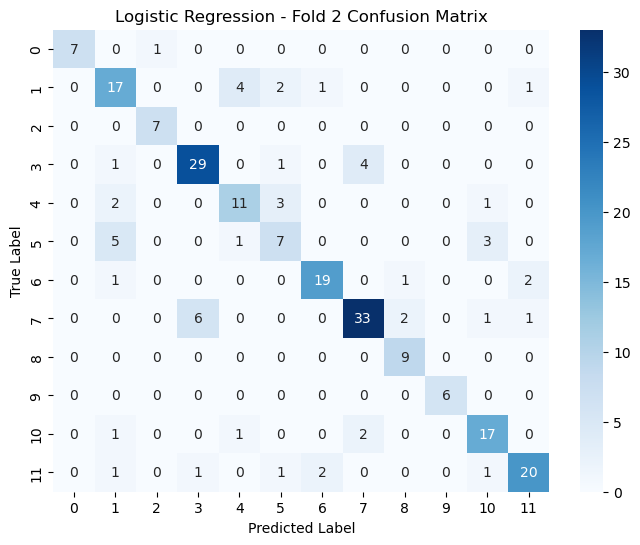


Fold 2 - Accuracy: 0.7712, F1 Score: 0.7706, ROC AUC: 0.9663, G-Mean: 0.8662


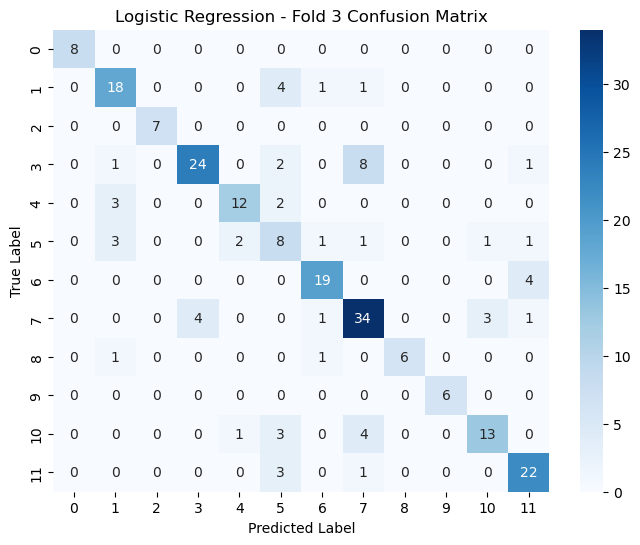


Fold 3 - Accuracy: 0.7500, F1 Score: 0.7534, ROC AUC: 0.9578, G-Mean: 0.8513


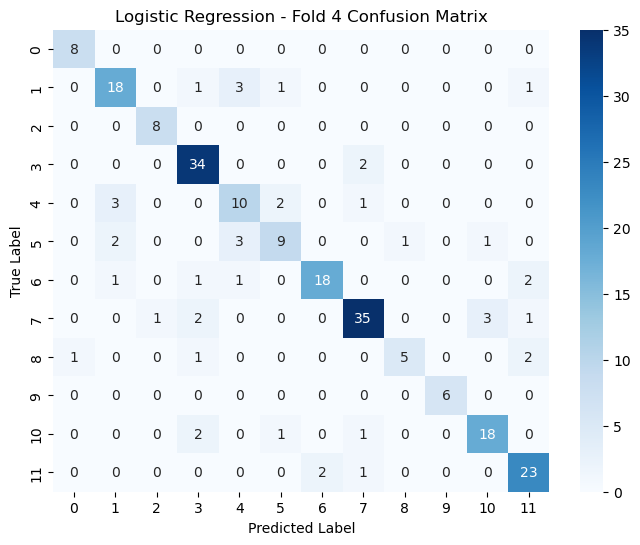


Fold 4 - Accuracy: 0.8136, F1 Score: 0.8107, ROC AUC: 0.9676, G-Mean: 0.8918


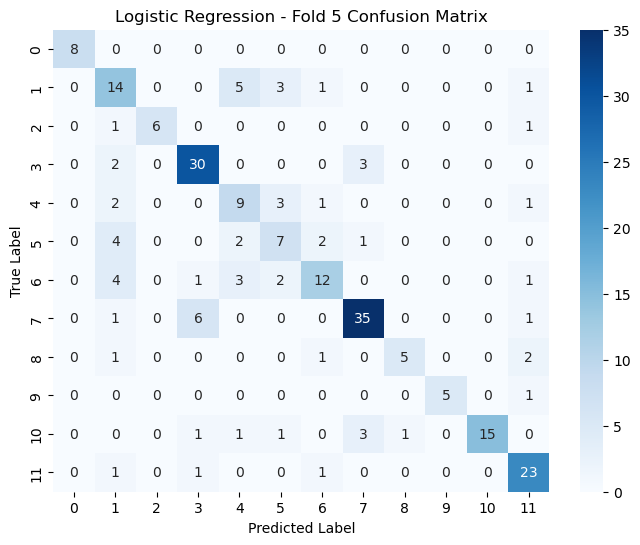


Fold 5 - Accuracy: 0.7161, F1 Score: 0.7196, ROC AUC: 0.9564, G-Mean: 0.8316

Logistic Regression - Mean Accuracy: 0.7654 ± 0.0314
Logistic Regression - Mean F1 Score: 0.7662 ± 0.0292
Logistic Regression - Mean ROC AUC: 0.9625 ± 0.0045
Logistic Regression - Mean G-Mean: 0.8621 ± 0.0196


In [55]:
# Loop over models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with k-fold CV, kNN imputation, and SelectKBest...")

    # Containers for metrics across folds
    fold_accuracies = []
    fold_f1_scores = []
    fold_auc_scores = []
    fold_gmeans = []
    fold_confusion_matrices = []

    # k-Fold Cross-Validation Loop
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # Extract train and test sets for the current fold
        X_fold_train = X_train.iloc[train_index]
        X_fold_test = X_train.iloc[test_index]
        y_fold_train = y_train.iloc[train_index]
        y_fold_test = y_train.iloc[test_index]

        # Apply KNN Imputer to impute missing values
        X_fold_train_imputed = imputer.fit_transform(X_fold_train)
        X_fold_test_imputed = imputer.transform(X_fold_test)

        # Train the model on all features
        clf = model.fit(X_fold_train_imputed, y_fold_train)

        # Predict and evaluate metrics on the test fold
        y_pred = clf.predict(X_fold_test_imputed)
        fold_accuracy = accuracy_score(y_fold_test, y_pred)
        fold_f1 = f1_score(y_fold_test, y_pred, average='weighted')
        fold_gmean = geometric_mean_score(y_fold_test, y_pred, average='weighted')

        # ROC AUC requires probability estimates for each class
        y_proba = clf.predict_proba(X_fold_test_imputed)
        fold_auc = roc_auc_score(y_fold_test, y_proba, multi_class='ovr', average='weighted')

        # Append metrics for this fold
        fold_accuracies.append(fold_accuracy)
        fold_f1_scores.append(fold_f1)
        fold_auc_scores.append(fold_auc)
        fold_gmeans.append(fold_gmean)

        # Calculate and store confusion matrix for this fold
        fold_conf_matrix = confusion_matrix(y_fold_test, y_pred)
        fold_confusion_matrices.append(fold_conf_matrix)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(fold_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"{model_name} - Fold {i+1} Confusion Matrix")
        plt.show()

        # Print metrics for this fold
        print(f"\nFold {i+1} - Accuracy: {fold_accuracy:.4f}, F1 Score: {fold_f1:.4f}, "
              f"ROC AUC: {fold_auc:.4f}, G-Mean: {fold_gmean:.4f}")

    # Display averaged metrics with 95% confidence intervals
    mean_accuracy = np.mean(fold_accuracies)
    accuracy_confidence_interval = 1.96 * sem(fold_accuracies)

    mean_f1 = np.mean(fold_f1_scores)
    f1_confidence_interval = 1.96 * sem(fold_f1_scores)

    mean_auc = np.mean(fold_auc_scores)
    auc_confidence_interval = 1.96 * sem(fold_auc_scores)

    mean_gmean = np.mean(fold_gmeans)
    gmean_confidence_interval = 1.96 * sem(fold_gmeans)

    print(f"\n{model_name} - Mean Accuracy: {mean_accuracy:.4f} ± {accuracy_confidence_interval:.4f}")
    print(f"{model_name} - Mean F1 Score: {mean_f1:.4f} ± {f1_confidence_interval:.4f}")
    print(f"{model_name} - Mean ROC AUC: {mean_auc:.4f} ± {auc_confidence_interval:.4f}")
    print(f"{model_name} - Mean G-Mean: {mean_gmean:.4f} ± {gmean_confidence_interval:.4f}")


Version with top 200 proteins

In [56]:
# Select the top 200 proteins
k_best_features = 200
selector = SelectKBest(score_func=f_classif, k=k_best_features)


Evaluating Logistic Regression with k-fold CV, kNN imputation, and SelectKBest...


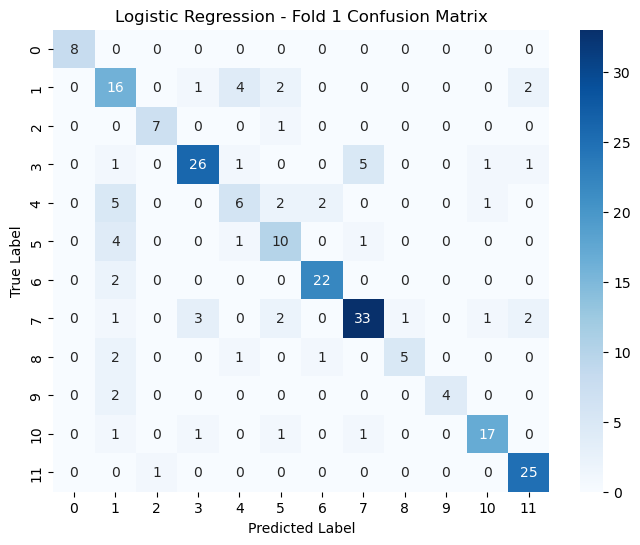


Fold 1 - Accuracy: 0.7553, F1 Score: 0.7567, ROC AUC: 0.9516, G-Mean: 0.8562


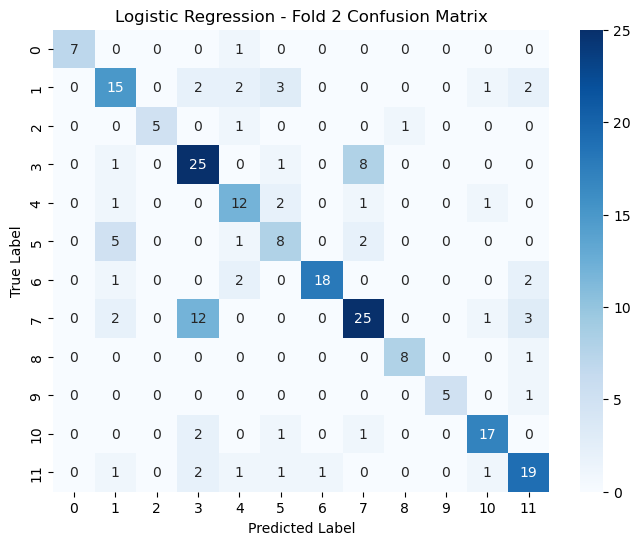


Fold 2 - Accuracy: 0.6949, F1 Score: 0.6983, ROC AUC: 0.9479, G-Mean: 0.8158


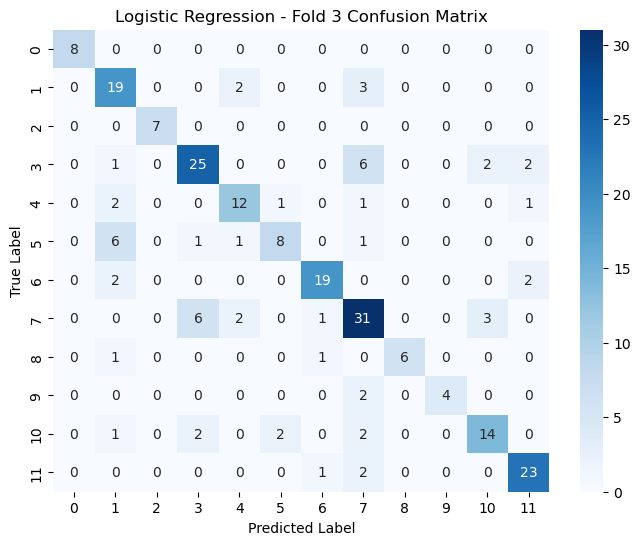


Fold 3 - Accuracy: 0.7458, F1 Score: 0.7455, ROC AUC: 0.9414, G-Mean: 0.8471


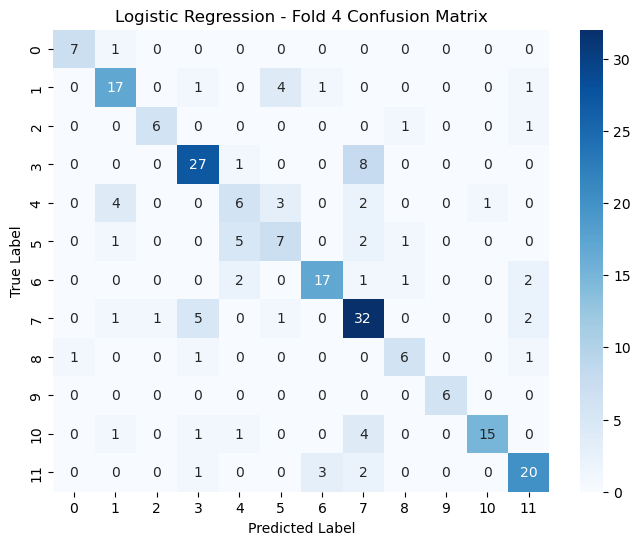


Fold 4 - Accuracy: 0.7034, F1 Score: 0.7040, ROC AUC: 0.9570, G-Mean: 0.8217


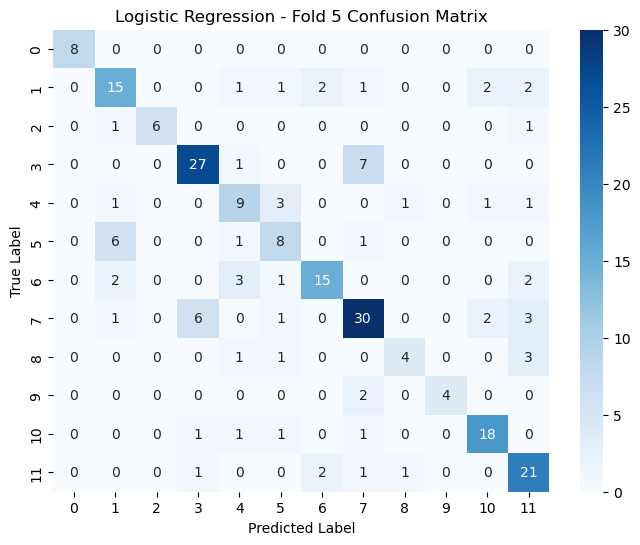


Fold 5 - Accuracy: 0.6992, F1 Score: 0.6997, ROC AUC: 0.9324, G-Mean: 0.8197

Logistic Regression - Mean Accuracy: 0.7197 ± 0.0250
Logistic Regression - Mean F1 Score: 0.7208 ± 0.0245
Logistic Regression - Mean ROC AUC: 0.9461 ± 0.0084
Logistic Regression - Mean G-Mean: 0.8321 ± 0.0160


In [57]:
# Loop over models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with k-fold CV, kNN imputation, and SelectKBest...")

    # Containers for metrics across folds
    fold_accuracies = []
    fold_f1_scores = []
    fold_auc_scores = []
    fold_gmeans = []
    fold_confusion_matrices = []

    # k-Fold Cross-Validation Loop
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # Extract train and test sets for the current fold
        X_fold_train = X_train.iloc[train_index]
        X_fold_test = X_train.iloc[test_index]
        y_fold_train = y_train.iloc[train_index]
        y_fold_test = y_train.iloc[test_index]

        # Apply KNN Imputer to impute missing values
        X_fold_train_imputed = imputer.fit_transform(X_fold_train)
        X_fold_test_imputed = imputer.transform(X_fold_test)

        # Apply SelectKBest to select top ___ features
        X_fold_train_selected = selector.fit_transform(X_fold_train_imputed, y_fold_train)
        X_fold_test_selected = selector.transform(X_fold_test_imputed)

        # Train the model on the selected features
        clf = model.fit(X_fold_train_selected, y_fold_train)

        # Predict and evaluate metrics on the test fold
        y_pred = clf.predict(X_fold_test_selected)
        fold_accuracy = accuracy_score(y_fold_test, y_pred)
        fold_f1 = f1_score(y_fold_test, y_pred, average='weighted')
        fold_gmean = geometric_mean_score(y_fold_test, y_pred, average='weighted')

        # ROC AUC requires probability estimates for each class
        y_proba = clf.predict_proba(X_fold_test_selected)
        fold_auc = roc_auc_score(y_fold_test, y_proba, multi_class='ovr', average='weighted')

        # Append metrics for this fold
        fold_accuracies.append(fold_accuracy)
        fold_f1_scores.append(fold_f1)
        fold_auc_scores.append(fold_auc)
        fold_gmeans.append(fold_gmean)

        # Calculate and store confusion matrix for this fold
        fold_conf_matrix = confusion_matrix(y_fold_test, y_pred)
        fold_confusion_matrices.append(fold_conf_matrix)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(fold_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"{model_name} - Fold {i+1} Confusion Matrix")
        plt.show()

        # Print metrics for this fold
        print(f"\nFold {i+1} - Accuracy: {fold_accuracy:.4f}, F1 Score: {fold_f1:.4f}, "
              f"ROC AUC: {fold_auc:.4f}, G-Mean: {fold_gmean:.4f}")

    # Display averaged metrics with 95% confidence intervals
    mean_accuracy = np.mean(fold_accuracies)
    accuracy_confidence_interval = 1.96 * sem(fold_accuracies)

    mean_f1 = np.mean(fold_f1_scores)
    f1_confidence_interval = 1.96 * sem(fold_f1_scores)

    mean_auc = np.mean(fold_auc_scores)
    auc_confidence_interval = 1.96 * sem(fold_auc_scores)

    mean_gmean = np.mean(fold_gmeans)
    gmean_confidence_interval = 1.96 * sem(fold_gmeans)

    print(f"\n{model_name} - Mean Accuracy: {mean_accuracy:.4f} ± {accuracy_confidence_interval:.4f}")
    print(f"{model_name} - Mean F1 Score: {mean_f1:.4f} ± {f1_confidence_interval:.4f}")
    print(f"{model_name} - Mean ROC AUC: {mean_auc:.4f} ± {auc_confidence_interval:.4f}")
    print(f"{model_name} - Mean G-Mean: {mean_gmean:.4f} ± {gmean_confidence_interval:.4f}")


Final Trainings and Evaluations

In [58]:
# Train Logistic Regression on the training data with 1463 proteins and then test it on the test data

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)

# Apply KNN Imputer to impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model on the training data
clf = model.fit(X_train_imputed, y_train)

# Predict and evaluate metrics on test data
y_pred = clf.predict(X_test_imputed)
print('Accuracy =')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('f1 =')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

print('gmean =')
gmean = geometric_mean_score(y_test, y_pred, average='weighted')
print(gmean)

# ROC AUC requires probability estimates for each class
y_proba = clf.predict_proba(X_test_imputed)
print('ROC AUC =')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
print(auc)

Accuracy =
0.7567567567567568
f1 =
0.751937967605309
gmean =
0.8558418714293158
ROC AUC =
0.9596396944183206


In [59]:
# Train Logistic Regression on the training data with top 200 kbest proteins and then test it on the test data

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)
k_best_features = 200
selector = SelectKBest(score_func=f_classif, k=k_best_features)

# Apply KNN Imputer to impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SelectKBest to select top ___ features
X_train_selected = selector.fit_transform(X_train_imputed, y_train)
X_test_selected = selector.transform(X_test_imputed)

# Train the model on the training data
clf = model.fit(X_train_selected, y_train)

# Predict and evaluate metrics on test data
y_pred = clf.predict(X_test_selected)
print('Accuracy =')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('f1 =')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

print('gmean =')
gmean = geometric_mean_score(y_test, y_pred, average='weighted')
print(gmean)

# ROC AUC requires probability estimates for each class
y_proba = clf.predict_proba(X_test_selected)
print('ROC AUC =')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
print(auc)

Accuracy =
0.7331081081081081
f1 =
0.732414773097184
gmean =
0.8402682437522799
ROC AUC =
0.9486291282934526
